Estimate the angle with respect to the horizontal axis of the billiard cue in image31.jpg. To
verify your answer, rotate the input image accordingly. The result should be similar to image32.jpg.

the approach step by step :
Edge detection: Apply an edge detection algorithm, such as the Canny edge detector, to the image. This will highlight the edges in the image.

Hough line transform: Use the Hough line transform (cv2.HoughLinesP()) to detect lines in the edge-detected image. This will identify the straight edges present in the image.

Filter lines: Filter the detected lines based on their orientation and length. Since you are interested in the cue, you can filter out lines that are not within a certain range of angles (e.g., close to vertical or horizontal) and have a minimum length.

Estimate the angle: Once you have filtered the lines, calculate the angle of each line with respect to the horizontal axis. You can use the arctangent function to calculate the angle from the line's slope.

Analyze the angles: Analyze the angles of the detected lines to determine the angle of the billiard cue. You can choose the dominant angle or apply additional criteria, such as selecting the longest line or averaging the angles of multiple lines.

Visualize the result: Draw the detected lines and the estimated angle on the image to visualize the estimation


(<Axes: title={'center': 'result image{200-230} '}>,
 (-0.5, 509.5, 382.5, -0.5),
 Text(0.5, 1.0, 'result image{200-230} '))

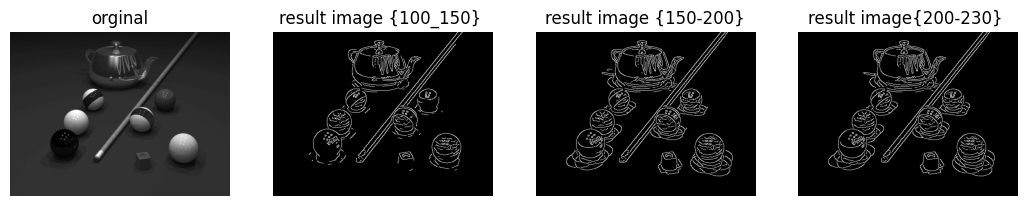

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import math
# Load the image
image = cv2.imread('image31.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
img_gaussian = cv2.GaussianBlur(image,(3,3),20)
# Apply Canny edge detection
img = cv2.Canny(img_gaussian, 450,500, (3, 3), 5)
edges2 = cv2.Canny(img_gaussian , 150, 200,(3, 3), 5)
edges3 = cv2.Canny(img_gaussian , 100, 230, (3, 3), 5)
fig, axes = plt.subplots(1, 4, figsize=(13,10))
# Display the original image and the detected edges
plt.subplot(1, 4, 1), plt.imshow(image,cmap = 'gray'), plt.axis('off'), plt.title('orginal')
plt.subplot(1, 4, 2), plt.imshow(img,cmap = 'gray'), plt.axis('off'), plt.title("result image {100_150} ")
plt.subplot(1, 4, 3), plt.imshow(edges2,cmap = 'gray'), plt.axis('off'), plt.title("result image {150-200}")
plt.subplot(1, 4, 4), plt.imshow(edges3,cmap = 'gray'), plt.axis('off'), plt.title("result image{200-230} ")
# Detect the cue and extract its end points
# Replace this step with your cue detection method




Angles found for every edge in roof:  [50.99999891472613, 50.99999891472613, 52.000000080918525]


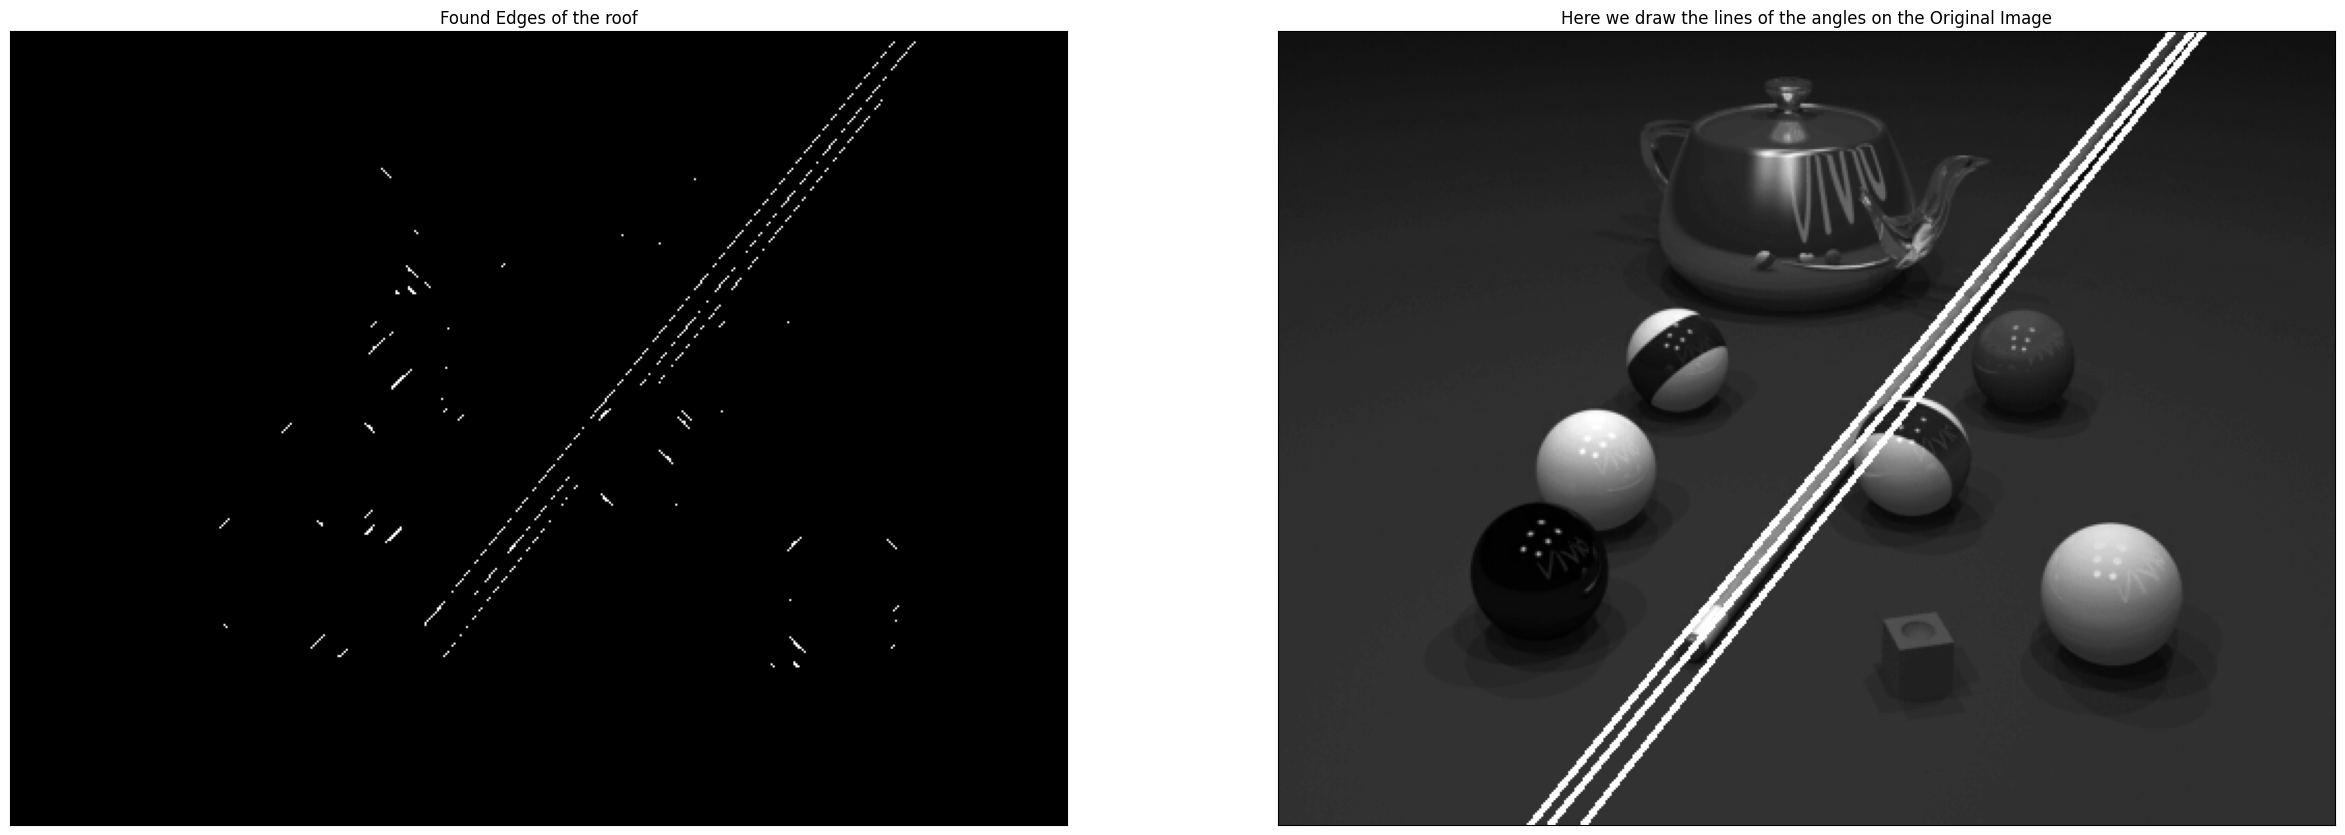



The estimated angle of the billiard cue with respect to the horizontal axis is: 51.33333263679026 degrees




In [ ]:

# construct the structure elements
a = np.zeros((7, 7), np.uint8)
np.fill_diagonal(a, 1)

b = np.zeros((7, 7), np.uint8)
np.fill_diagonal(b[::-1], 1)

one = cv2.erode(img, a, iterations=1)
second = cv2.erode(img, b, iterations=1)

# construct the billiard cue

cue = cv2.add(one, second)

# apply hough line transformation to detect the thetas that contribute most in respective lines
lines = cv2.HoughLines(cue, 1, np.pi / 180, 55)

edge_degrees = []
for line in lines:
    for rho, theta in line:
        # append every degree value that match with hough lines transform

        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        
        theta_degrees = math.degrees(theta)

        if theta_degrees< 90:
          angle = 90 - theta_degrees
        else:
          angle = 270 - theta_degrees

        # append the angles to a list
        edge_degrees.append(angle)
        cv2.line(image, (x1, y1), (x2, y2), (255, 0, 0), 2)
        

# graph plot     
fig, axes = plt.subplots(1, 2, figsize=(30,13))
plt.subplot(121),plt.imshow(cue, cmap = 'gray')
plt.title('Found Edges of the roof', fontsize=12), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(image, cmap = 'gray')
plt.title('Here we draw the lines of the angles on the Original Image', fontsize=12), plt.xticks([]), plt.yticks([])

print("Angles found for every edge in roof: ", edge_degrees)
plt.show()   

# in order to estimate the angle with respect to horizontal axis we take the average of these two lines
est_angle = sum(edge_degrees) * 1.0 / len(edge_degrees)

print('\n')
print('The estimated angle of the billiard cue with respect to the horizontal axis is:', est_angle, 'degrees')
print('\n')

(Text(0.5, 1.0, 'compared image'), ([], []), ([], []))

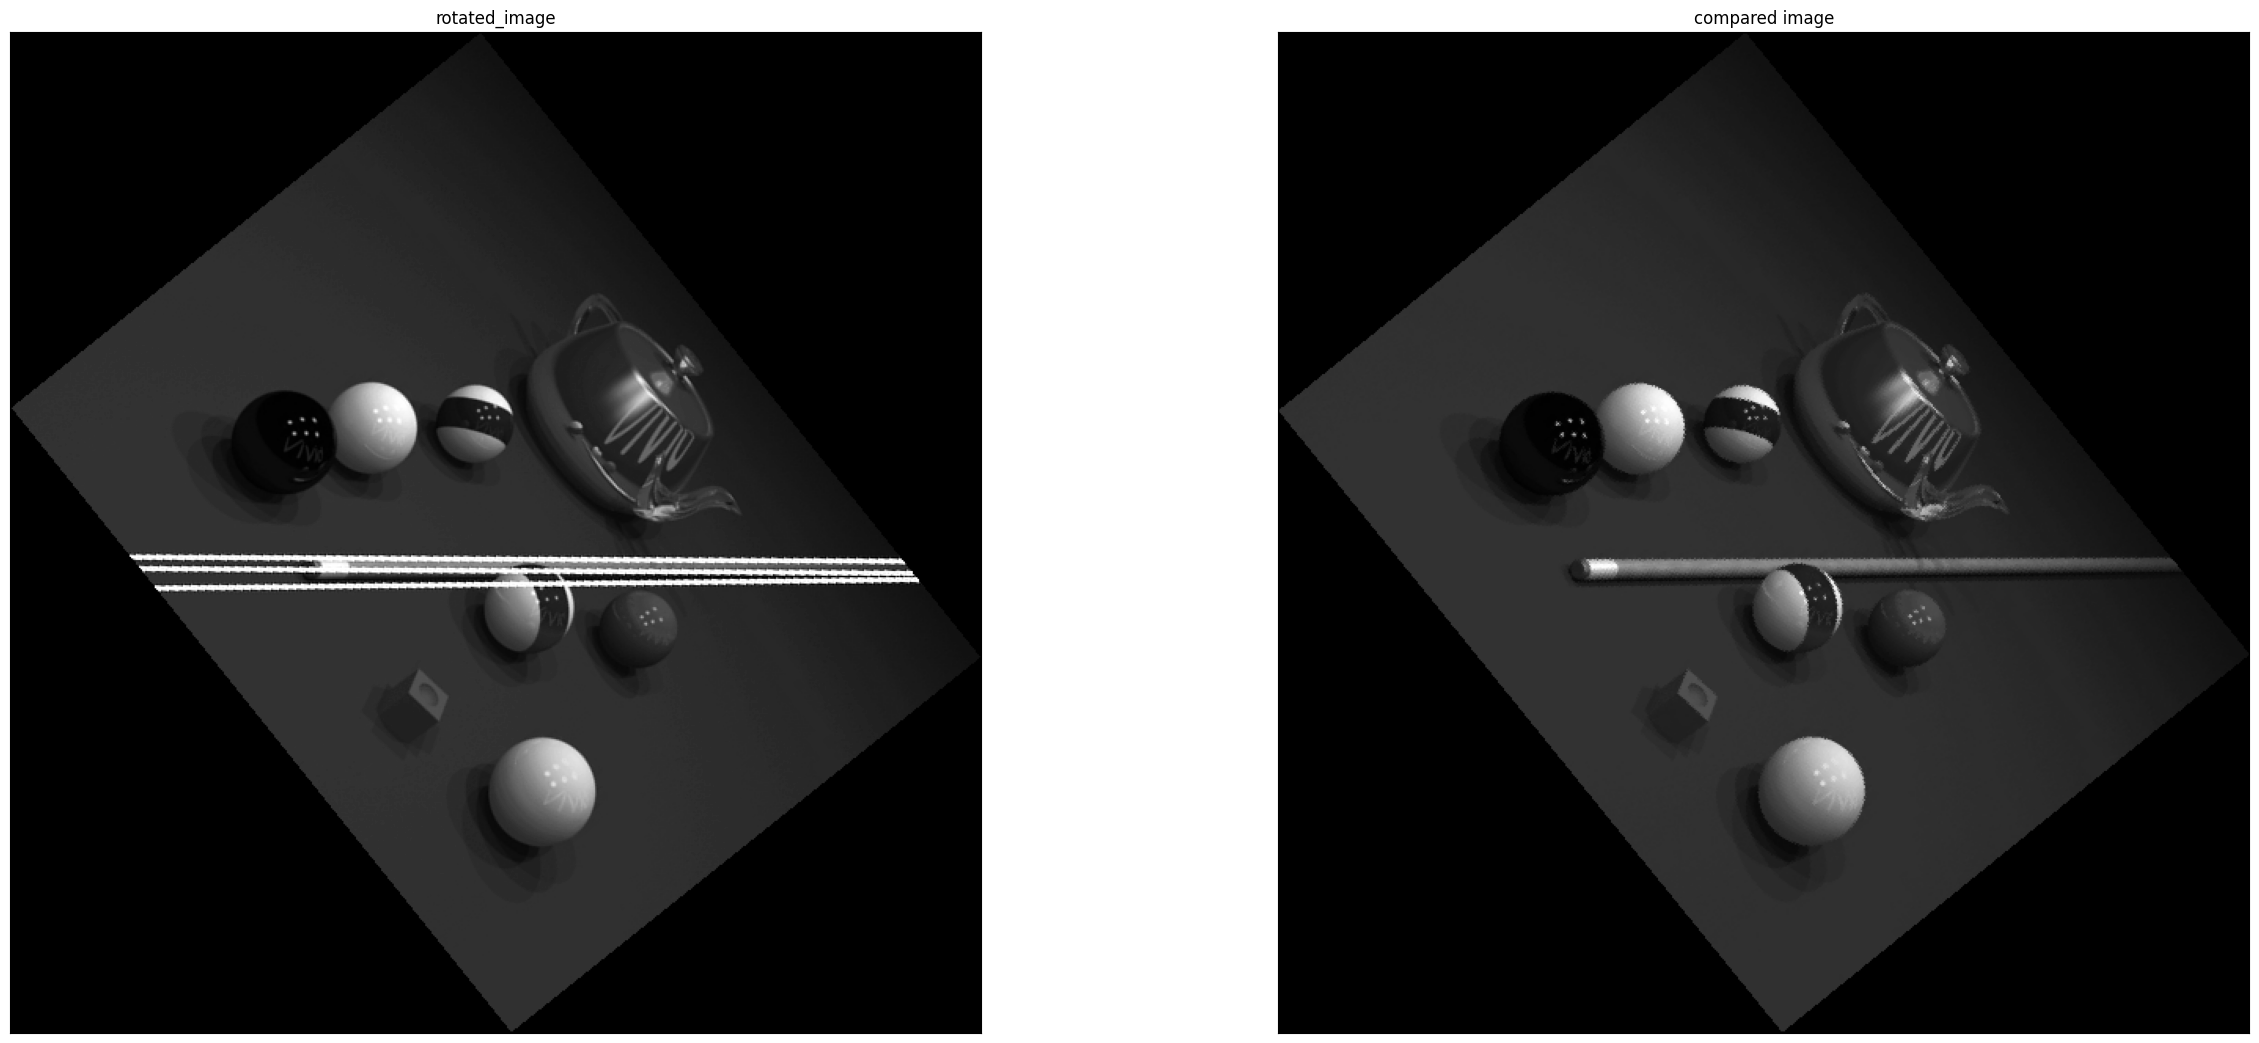

In [ ]:
from google.colab.patches import cv2_imshow
# Rotate the image based on the estimated angle
from scipy import ndimage
from PIL import Image
import pandas as pd
from scipy.ndimage import rotate
compare_image = cv2.imread('/content/image32.png')

rotated_image = rotate(image, -est_angle)
# graph plot     
fig, axes = plt.subplots(1, 2, figsize=(30,13))
plt.subplot(121),plt.imshow(rotated_image, cmap = 'gray')
plt.title('rotated_image', fontsize=12), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(compare_image, cmap = 'gray')
plt.title('compared image', fontsize=12), plt.xticks([]), plt.yticks([])

**from the plot above we got the same image after rotating the original image by the estimated angle . **

# b. Combine image31.jpg and image32.jpg to generate an image similar to image 33.jpg.

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


# Read the input image
image = cv2.imread("image32.png")

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Perform edge detection
edges = cv2.Canny(gray, 100, 200)

# Apply Hough Line Transform
lines = cv2.HoughLines(edges, 1, np.pi / 180, 100)

# Find the longest horizontal line
longest_line = None
longest_line_length = 0
angle_threshold = 10

for line in lines:
    rho, theta = line[0]
    if abs(np.degrees(theta) - 90) < angle_threshold:
        line_length = abs(rho)
        if line_length > longest_line_length:
            longest_line_length = line_length
            longest_line = line

# Draw the longest line on a blank image
blank_image = np.zeros_like(image)
rho, theta = longest_line[0]
a = np.cos(theta)
b = np.sin(theta)
x0 = a * rho
y0 = b * rho
x1 = int(x0 + longest_line_length * (-b))
y1 = int(y0 + longest_line_length * (a))
x2 = int(x0 - longest_line_length * (-b))
y2 = int(y0 - longest_line_length * (a))
cv2.line(blank_image, (x1, y1), (x2, y2), (255, 255, 255), 2)

# Extract the billiard cue region using bitwise AND operation
cue_image = cv2.bitwise_and(image, blank_image)
cue_image_re =cv2.bitwise_or(cue_image, cue) 
fig, axes = plt.subplots(1, 3, figsize=(30,13))
# Display the original image, edges, and the cue region
plt.subplot(131)
plt.imshow( image)
plt.subplot(132)
plt.imshow(edges)
plt.subplot(133)
plt.imshow( cue_image_re)



error: ignored

In [ ]:
# imreconstruct method similar to matlab
def imreconstruct(marker: np.ndarray, mask: np.ndarray, radius: int = 1):
    """Iteratively expand the markers white keeping them limited by the mask during each iteration.
    :param marker: Grayscale image where initial seed is white on black background.
    :param mask: Grayscale mask where the valid area is white on black background.
    :param radius Can be increased to improve expansion speed while causing decreased isolation from nearby areas.
    :returns A copy of the last expansion.
    Written By Semnodime.
    """
    kernel = np.ones(shape=(radius * 2 + 1,) * 2, dtype=np.uint8)
    while True:
        expanded = cv2.dilate(src=marker, kernel=kernel)
        cv2.bitwise_and(src1=expanded, src2=mask, dst=expanded)

        # Termination criterion: Expansion didn't change the image at all
        if (marker == expanded).all():
            return expanded
        marker = expanded


# perform open close iterative
def open_close(image):
    for i in range(3, 7):
        close = cv2.morphologyEx(image, cv2.MORPH_CLOSE, np.ones((i, i), np.uint8))
        open = cv2.morphologyEx(close, cv2.MORPH_OPEN, np.ones((i, i), np.uint8))

    return open

(<Axes: title={'center': 'Final Constructed Image'}>,
 (-0.5, 618.5, 637.5, -0.5),
 Text(0.5, 1.0, 'Final Constructed Image'))

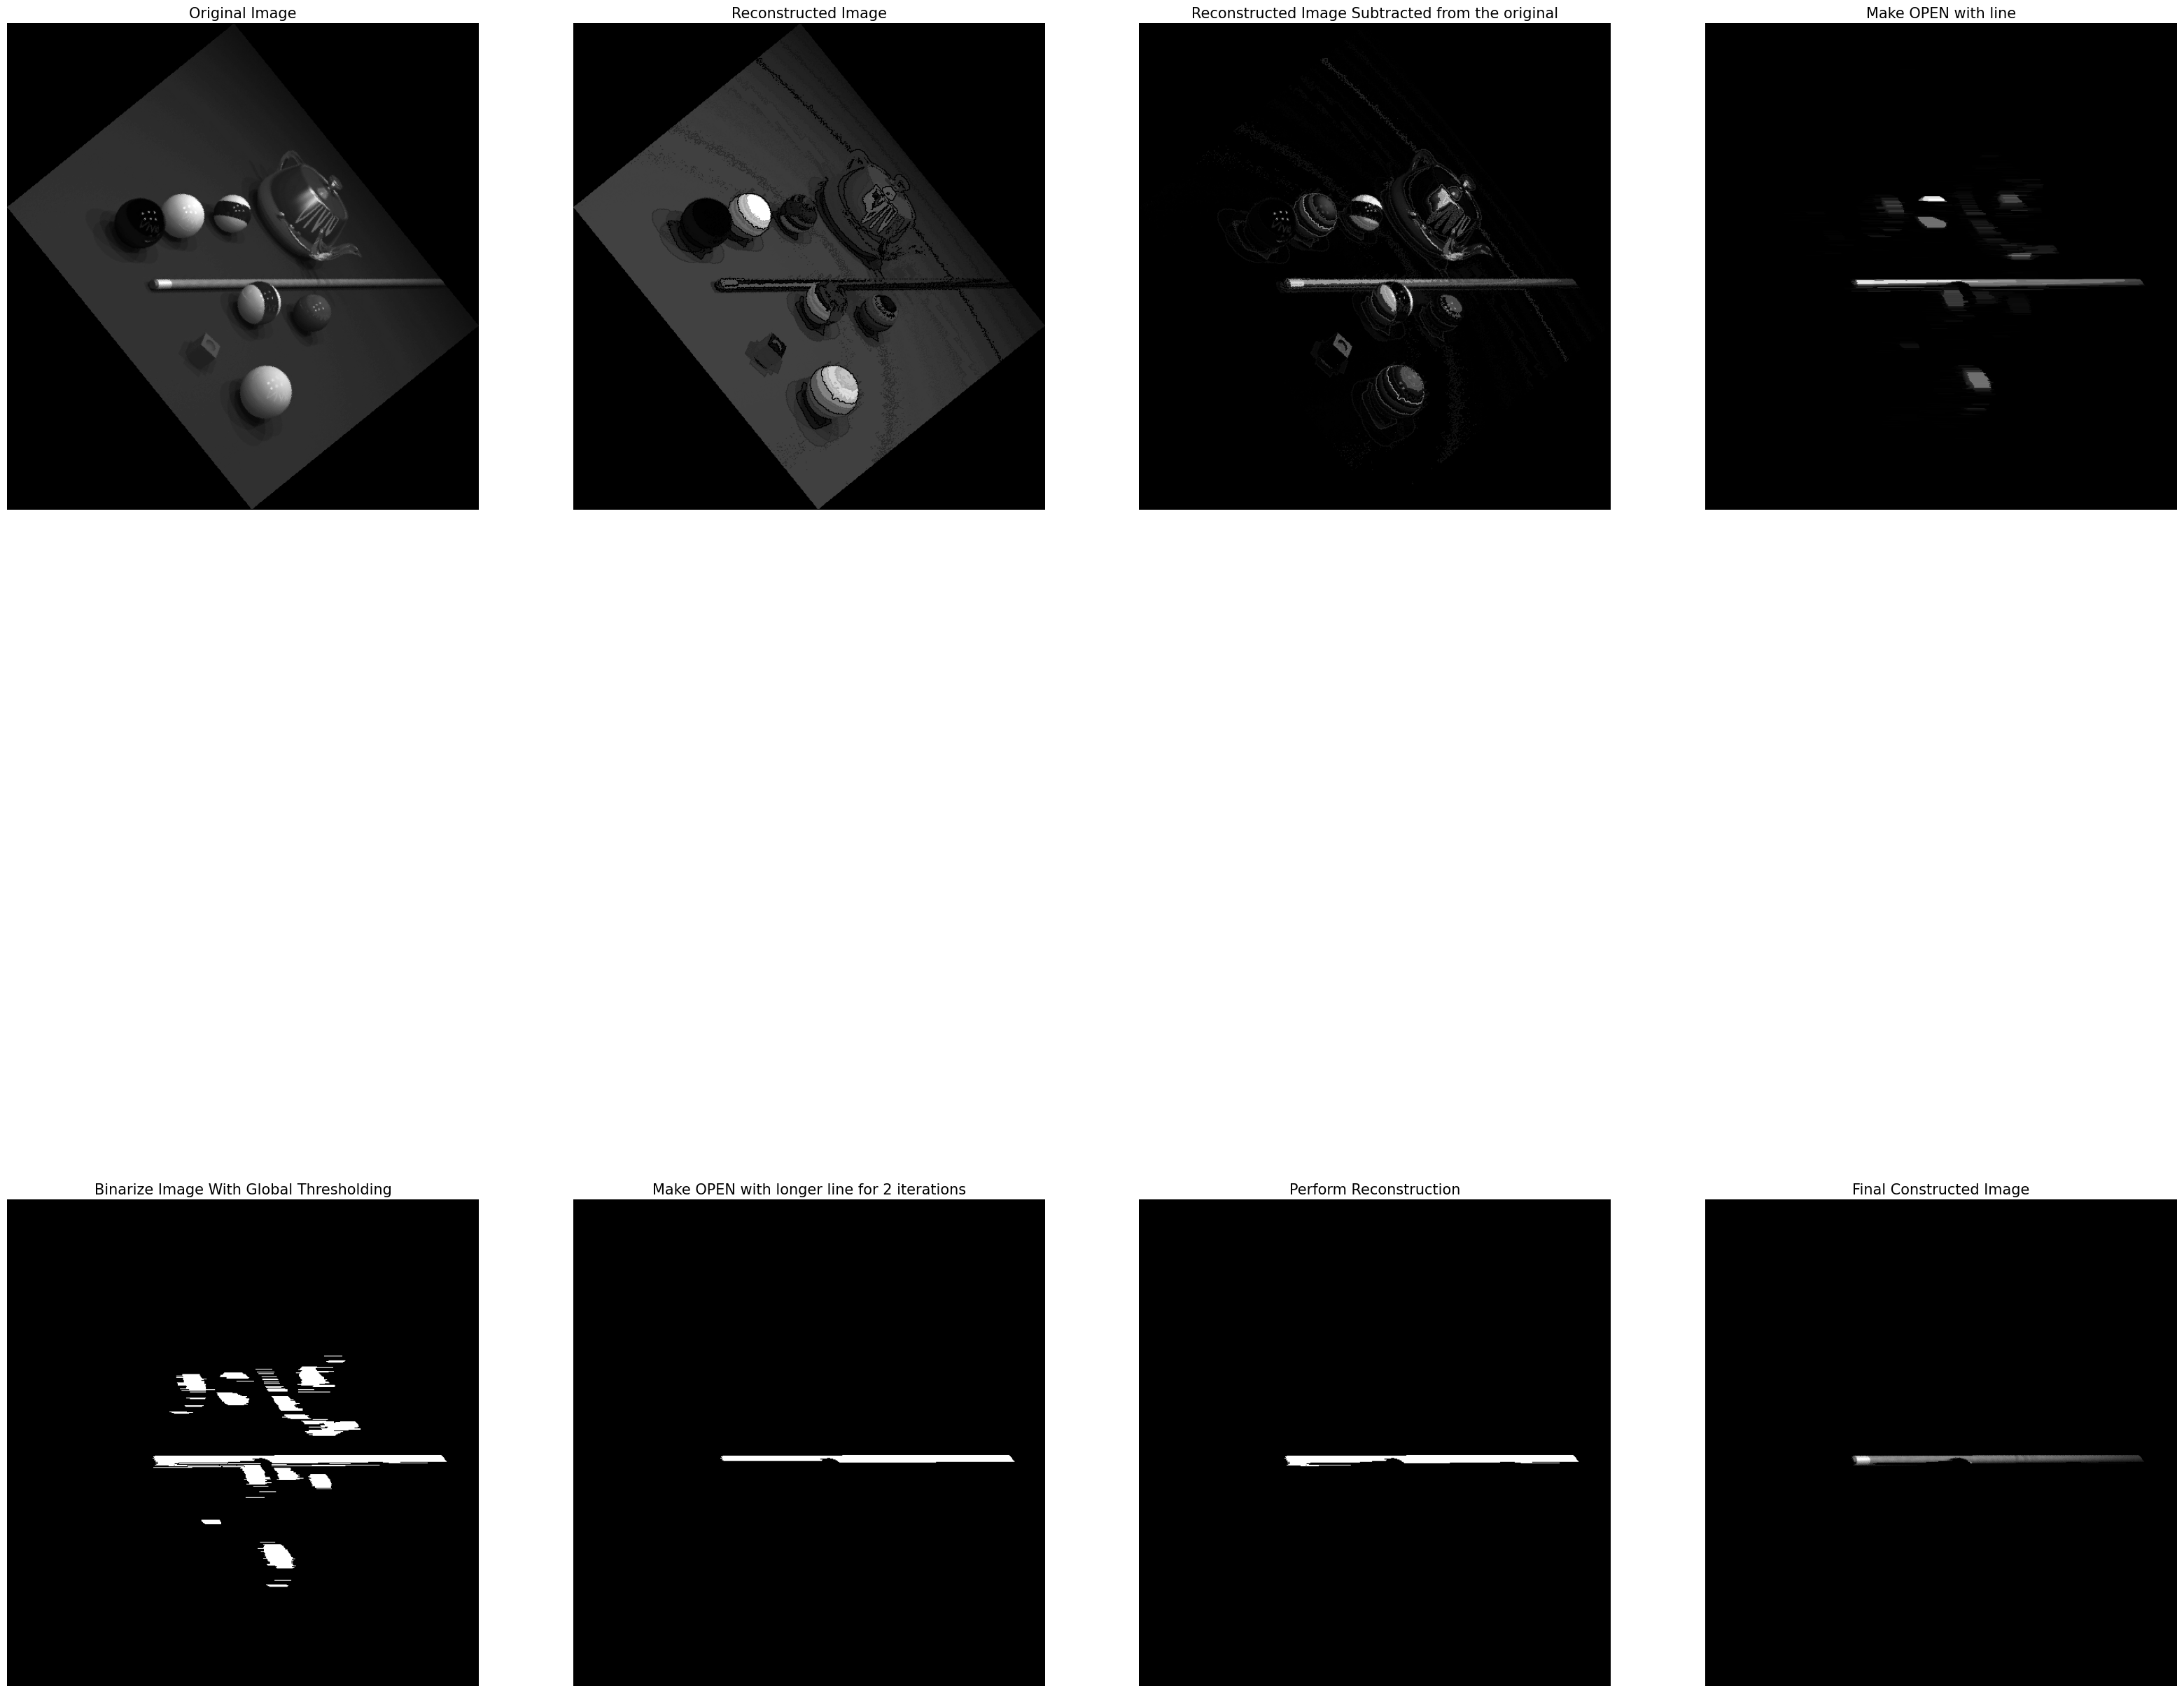

In [ ]:
image_gray = cv2.imread("image32.png", 0)

# method that performs reconstruction
def reconstruction(original_image, seed_image, dilation_matrix):
    temp = seed_image
    for i in range(500):
        temp = cv2.dilate(temp, dilation_matrix, iterations=1)
        temp = original_image * temp
    return temp

# Tophat reconstruction with an ellipse as structuring element
disk = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 4))
marker = cv2.erode(image_gray, disk, iterations=5)
recon1 = imreconstruct(marker, image_gray)
tophat_reconstruction = cv2.subtract(image_gray, recon1)

# Erosion with line kernel as structuring element in order to differentiate the billiard ball that is connected to the cue
#line = np.ones((1, 20), np.uint8)
#marker2 = cv2.erode(tophat_reconstruction, line, iterations=1)

line = np.ones((1, 20), np.uint8)
marker2 = cv2.morphologyEx(tophat_reconstruction, cv2.MORPH_OPEN, line)

# Global thresholding to binarize the image
threshold = cv2.threshold(marker2, 5, 255, cv2.THRESH_BINARY)

# At that step only a very long shape was left in the image so we extracted it with OPEN with a longer line kernel than previously
long_line = np.ones((1, 60), np.uint8)
marker3 = cv2.morphologyEx(threshold[1], cv2.MORPH_OPEN, long_line, iterations = 2)
recon2 = reconstruction(threshold[1], marker3, np.ones((3, 3), np.uint8))


# Finally we reconstructed the biggest part of the billiard cue in binarized form
recon2[recon2 == 255] = 1
reproduced = recon2 * image_gray


fig, axes = plt.subplots(2, 4)
plt.gcf().set_size_inches(40, 40)

plt.subplot(241), plt.imshow(image_gray, cmap='gray'), plt.axis('off'), plt.title('Original Image', fontsize=15)

plt.subplot(242), plt.imshow(recon1, cmap='gray'), plt.axis('off'), plt.title('Reconstructed Image', fontsize=15)

plt.subplot(243), plt.imshow(tophat_reconstruction, cmap='gray'), plt.axis('off'), plt.title('Reconstructed Image Subtracted from the original', fontsize=15)

plt.subplot(244), plt.imshow(marker2, cmap='gray'), plt.axis('off'), plt.title('Make OPEN with line', fontsize=15)

plt.subplot(245), plt.imshow(threshold[1], cmap='gray'), plt.axis('off'), plt.title('Binarize Image With Global Thresholding', fontsize=15)

plt.subplot(246), plt.imshow(marker3, cmap='gray'), plt.axis('off'), plt.title('Make OPEN with longer line for 2 iterations', fontsize=15)

plt.subplot(247), plt.imshow(recon2, cmap='gray'), plt.axis('off'), plt.title('Perform Reconstruction', fontsize=15)

plt.subplot(248), plt.imshow(reproduced, cmap='gray'), plt.axis('off'), plt.title('Final Constructed Image', fontsize=15)

True

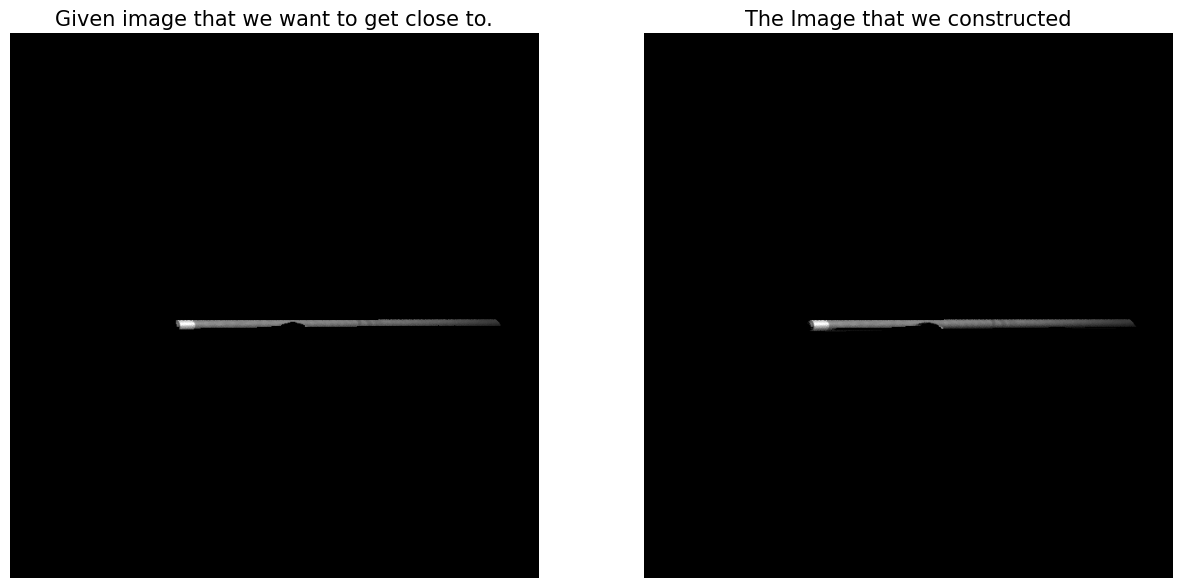

In [ ]:
image= cv2.imread("image33.png", 0)


fig, axes = plt.subplots(1, 2)
plt.gcf().set_size_inches(15, 15)

plt.subplot(121), plt.imshow(image, cmap='gray'), plt.axis('off'), plt.title('Given image that we want to get close to.', fontsize=15)

plt.subplot(122), plt.imshow(reproduced, cmap='gray'), plt.axis('off'), plt.title('The Image that we constructed', fontsize=15)

cv2.imwrite('Our Final Image.jpg', reproduced)